<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

1. Ket Takeaways for Business
2. Profiling report and Correlations
    - Pandas profiling report
    - Correlation Plot (Cramer's V test)
    - Phik (φk) correlations
3. Exploratory Data Analysis
    - Industrial Risk vs Class
    - Management_Risk vs Class
    - Financial_Flexibility vs Class
    - Credibility vs Class
    - Competitiveness vs Class
    - Operating_Risk vs Class
    - Industrial Risk and Management risk
4. Classification Model to predict Bankruptcy
    - Setting up the Pre-processing pipeline
    - Modelling for Bankruptcy indicator
        - Building top 10 models
        - Tuning Hyperparameters of top 10 models
    - Feature importances
    - AUC Plot
    - Confusion Matrix
    - Using SHAP values to explain the model

<font color='red' style="font-weight:bold;">

<p>
Please run the above cell to obtain your table of contents.
</p>
</font>

# Qualitative Bankruptcy dataset

```
1. Title: Qualitative_Bankruptcy database
 
4. Number of Instances: 250 
 
5. Number of Attributes: 6, each corresponding to Qualitative Parameters in Bankruptcy
 
6. Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
 
     1. Industrial Risk: {P,A,N}
     2. Management Risk: {P,A,N}
     3. Financial Flexibility: {P,A,N}
     4. Credibility: {P,A,N}
     5. Competitiveness: {P,A,N}
     6. Operating Risk: {P,A,N}
     7. Class: {B,NB}

Internal Risks: 	
i.Industry risk (IR) : 
	Government policies and International agreements, 
	Cyclicality, 
	Degree of competition,				
	The price and stability of market supply,
	The size and growth of market demand,	
	The sensitivity to changes in macroeconomic factors,
	Domestic and international competitive power, 
	Product Life Cycle.
ii.Management risk(MR): 
	Ability and competence of management, 
	Stability of management,
	The relationship between management/ owner, 
	Human resources management, 
	Growth process/business performance, 
	Short and long term business planning, 
	achievement and feasibility. 
iii.Financial Flexibility(FF): 
	Direct financing, 
	Indirect financing, 
	Other financing 
iv.Credibility (CR):  
	Credit history,  
	reliability of information, 
	The relationship with financial institutes.
v.Competitiveness (CO):  
	Market position, 
	The level of core capacities, 
	Differentiated strategy, 
vi.Operating Risk (OP):  
	The stability and diversity of procurement, 
	The stability of transaction, 
	The efficiency of production, 
	The prospects for demand for product and service, 
	Sales diversification,
	Sales price and settlement condition, 
	Collection of A/R,
	Effectiveness of sale network.
 
7. Missing Attribute Values: None
 
8. Class Distribution: [143 instances For Non-Bankruptcy] [107 instances For Bankruptcy]
        Information about the dataset
  	CLASSTYPE: nominal


```

# Import Packages

In [18]:
#### Import Packages

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling.model.correlations import *
import scipy.stats as ss
import itertools

import phik

from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix


# Key Takeaways for Business

<font color='red' style="font-weight:bold;">
     <font color='blue' style="font-weight:bold;"><p><u>Summary from Pandas profiling report and PhiK Correlation Analysis </u></p> </font> 

- There are 147 duplicate rows(out of a total of 250 rows (58.8%))

Based on Correlation Analysis : 
- Class is highly correlated with all the risk categories, but more so in terms of Competitiveness
This makes a lot of sense because more the risk, more are the chances to be bankrupt.


1. Competitiveness is correlated with Credibility and Financial flexibility

    - Credibility takes into consideration the credt report of a company, which inturn is highly dependent on the financial ability of the company. Hence, Credibility and Financial flexibility will be highly correlated

    - Competitiveness (Market position, Strategy, core abilities) are dependent heavily on financial soundness of a company. The more financially sound a company is, the better it is positioned in terms of market strategy, and hence better is its Competitiveness

2. Industrial Risk and Management risk are highly correlated

     The risk that a company faces in the industry (in terms of policies, agreements, market supply and demand) will put a lot of strain on the management layer of the company to perform better, which inturn will impact the stability of the management, and is an indication of its management's competence. 
    

</font>
<font color='red' style="font-weight:bold;">
     <font color='blue' style="font-weight:bold;"><p><u>Summary from EDA </u></p> </font> 

<p><li>67.5% of companies that have a Positive Industrial Risk aer Not Bankrupt. There is a higher propensity of a company to not go Bankrupt if the company is positive in terms of Industrial risk </li></p>
  <p><li>82% of companies that have a Positive Management Risk are Not Bankrupt. 
    There is a higher propensity of a company to not go Bankrupt if the company is positive in terms of Management risk.
    Hence a positive Management risk could be a great indicator of a company not going bankrupt
    </li></p>   
    <p><li> 85% of the companies that rank negative on Financial Flexibility are Bankrupt.94% of the companies that rank Average and 98% of the companies that rank positive on Financial Flexibility are not Bankrupt.This shows that Financial Flexibility could be a really good predictor of Bankruptcy </li></p> 
     <p><li> 92% of the companies that rank negative on Credibility are Bankrupt. 96% of the companies that rank Positive on Credibility are not Bankrupt.  This shows that Positive Credibility is a great indicator of 
        a non-bankrupt company and Negative Credibility is a pretty fair indicator of a bankrupt company  </li></p>
 <p><li> All companies that rank negative on Competitiveness are Bankrupt ==> This is a perfect predictor of a bankrupt company.
     All companies that rank Positive on Competitiveness are Not Bankrupt ==> This is a perfect predictor of a non-bankrupt company</li></p>
     <p><li> ~ 60% of the companies that are Bankrupt have Negative Operating Risk.~ 76% of the companies that have a positive Operating Risk are not bankrupt. Hence this can be a good proxy for
    non-bankrupt companies </li></p>

    
    
    
</font>

</font>
<font color='red' style="font-weight:bold;">
     <font color='blue' style="font-weight:bold;"><p><u>Summary from Modelling, Feature importances and SHAP </u></p> </font> 

<p><li>Extra Trees Classifier is the best classification model with an out-of-bag AUC of 1</li></p>
 <p><li>Best Predictors of the model are : 
      <ol>Competitiveness = N</ol>
      <ol>Financial Flexibility=N</ol>
      <ol>Competitiveness = P</ol>
     <ol>Credibility = N</ol></li></p>   
<p><li> The feature importance plot indicates that Competitiveness is the most important factor that determines Bankruptcy, followed by Financial Stability, which was inline with our initial Exploratory </li></p>
    <p><li> Competitiveness=N is the most important factor that determines Bankruptcy. This makes complete sense as we saw that Competitiveness=N directly corresponded to Bankruptcy and  Competitiveness=P directly corresponded to No-Bankruptcy </li></p>
<p><li> Similarly a firm having Negative Financial Flexibility is more likely to be Bankrupt, and so is a firm having Negative Credibility </li></p>

<font color='red' style="font-weight:bold;">
    <font color='blue' style="font-weight:bold;"><p><u>Takeaways from SHAP plot</u></p> </font>
<p><li> Competitiveness=N, Financial Flexibility=N,Credibility=N,Competiveness=P are the factors that help in explaining Bankruptcy </li></p>
</font>

    
    
<font color='black' style="font-weight:bold;">
<b>Please dive deeper into the each sections to understand better</b>
    </font>


# Profiling report and Correlations

In [19]:
df_bank=pd.read_csv("Qualitative_Bankruptcy.data.txt", sep=','
                    ,header=None,names=['Industrial_Risk','Management_Risk','Financial_Flexibility',
                                        'Credibility','Competitiveness','Operating_Risk','Class']
                   
                   )
df_bank

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
...,...,...,...,...,...,...,...
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B


### Pandas profiling report

Pandas Profiling is a library used to obtain a quick report of your data, and to obtain some useful hidden insights in very less span of time. It shows explorations, correlations, missing values , duplicates and several different information, which typically would take a data scientist a lot of time to obtain. The results of pandas-profiling cannot be saved onto the notebook, and hence will have to run it to obtain outputs

In [4]:
profile = ProfileReport(df_bank, title='Pandas Profiling Report', explorative=True)

In [5]:
profile.to_notebook_iframe()

### Phik (φk) correlations

The correlation coefficient ϕK provides a way to analyse dependencies among any type of variables (Categorical or numerical or ordinal), and is very similar to Pearson’s correlation coefficient

More information on Phik correlations can be found in the below link : 
https://phik.readthedocs.io/en/latest/tutorials.html

Hence, we are performing ϕK correlations to the fraud dataset to understand which variables are related to each other

In [35]:
phik_overview = df_bank.phik_matrix()
#phik_overview

In [28]:
df_bank.phik_matrix()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
Industrial_Risk,1.000000,0.626089,0.284138,0.000000,0.467745,0.466636,0.143480
Management_Risk,0.626089,1.000000,0.476595,0.523483,0.576860,0.527319,0.223512
Financial_Flexibility,0.284138,0.476595,1.000000,0.790047,0.874190,0.307485,0.556888
Credibility,0.000000,0.523483,0.790047,1.000000,0.849799,0.472916,0.526835
Competitiveness,0.467745,0.576860,0.874190,0.849799,1.000000,0.501039,0.738971
Operating_Risk,0.466636,0.527319,0.307485,0.472916,0.501039,1.000000,0.161868
Class,0.143480,0.223512,0.556888,0.526835,0.738971,0.161868,1.000000


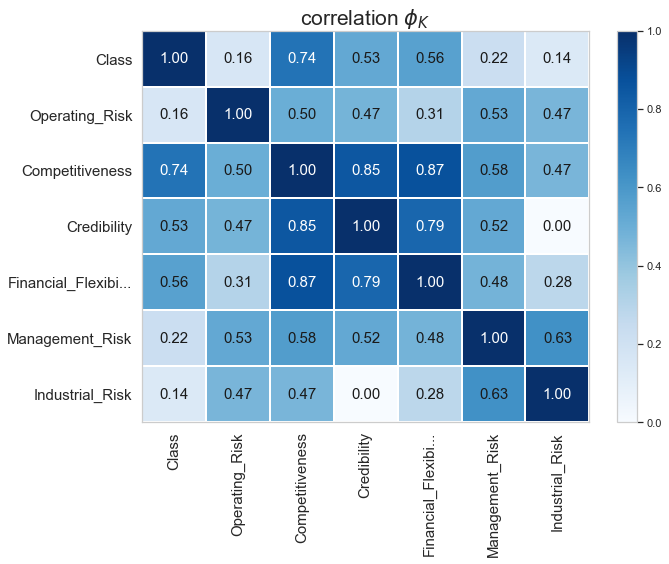

In [33]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(10,8))
plt.tight_layout()


<font color='red' style="font-weight:bold;">
     <font color='blue' style="font-weight:bold;"><p><u>Points to note from Pandas profiling report : </u></p> </font> 

- There are 147 duplicate rows(out of a total of 250 rows (58.8%))

Based on Correlation Analysis : 
- Class is highly correlated with all the risk categories, but more so in terms of Competitiveness
This makes a lot of sense because more the risk, more are the chances to be bankrupt.


1. Competitiveness is correlated with Credibility and Financial flexibility

    - Credibility takes into consideration the credt report of a company, which inturn is highly dependent on the financial ability of the company. Hence, Credibility and Financial flexibility will be highly correlated

    - Competitiveness (Market position, Strategy, core abilities) are dependent heavily on financial soundness of a company. The more financially sound a company is, the better it is positioned in terms of market strategy, and hence better is its Competitiveness

2. Industrial Risk and Management risk are highly correlated

     The risk that a company faces in the industry (in terms of policies, agreements, market supply and demand) will put a lot of strain on the management layer of the company to perform better, which inturn will impact the stability of the management, and is an indication of its management's competence. 

</font>

# Exploratory Data Analysis

It is customary to perform EDA on any dataset, before proceeding to data pre-processing and modelling stages, to get a feel of the data and to understand more about different relationships. In this exercise, I have performed EDA on all variables with respect to Class. Important points are highlighted in <font color='red' style="font-weight:bold;">red color</font>

I request the reader to go through the notebook like a story book , and read all the comments written in the notebook to have a better understanding of my approach towards the data analysis problem


### Industrial Risk vs Class

<Figure size 288x216 with 0 Axes>

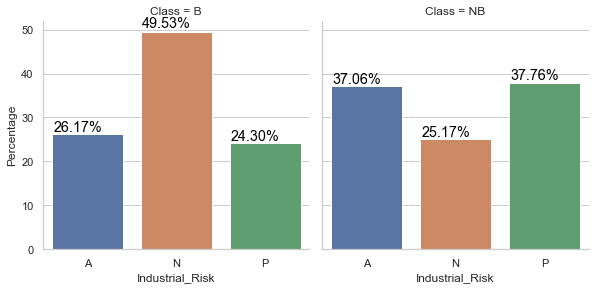

In [17]:

df_class_IR=df_bank.groupby(['Class','Industrial_Risk'])['Credibility'].count()
df_class_IR
df_class_IR_1=(df_class_IR/df_class_IR.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_IR_1.rename(columns={"Credibility": "Percentage"},inplace=True)
#sns.set_theme(style="darkgrid")
sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Industrial_Risk",y="Percentage",col="Class",col_wrap=4
                ,data=df_class_IR_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(2):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')


        


<Figure size 288x216 with 0 Axes>

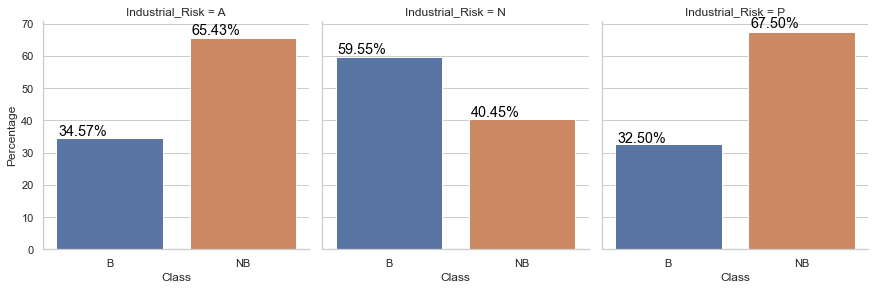

In [85]:

df_class_IR=df_bank.groupby(['Industrial_Risk','Class'])['Credibility'].count()
df_class_IR
df_class_IR_1=(df_class_IR/df_class_IR.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_IR_1.rename(columns={"Credibility": "Percentage"},inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Class",y="Percentage",col="Industrial_Risk",col_wrap=4
                ,data=df_class_IR_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(3):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')


        


<font color='red' style="font-weight:bold;">
      <font color='blue' style="font-weight:bold;"><p><u>TAKEAWAYS from the analysis of Industrial Risk and Class</u></p> </font> 
   
<p>
<li>
50% of the companies that are Bankrupt have Negative Industrial Risk. This shows that if a company fails on any 
of the industy-related factors, there is a 50% chance that the company may go Bankrupt
</li>
</p>
    <p><li>67.5% of companies that have a Positive Industrial Risk aer Not Bankrupt. There is a higher propensity of a company to not go Bankrupt if the company is positive in terms of Industrial risk </li></p>


</font>

### Management_Risk vs Class

<Figure size 288x216 with 0 Axes>

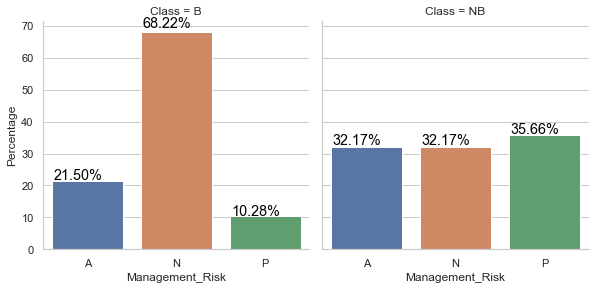

In [79]:

df_class_MR=df_bank.groupby(['Class','Management_Risk'])['Credibility'].count()
df_class_MR
df_class_MR_1=(df_class_MR/df_class_MR.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_MR_1.rename(columns={"Credibility": "Percentage"},inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Management_Risk",y="Percentage",col="Class",col_wrap=4
                ,data=df_class_MR_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(2):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')

<Figure size 288x216 with 0 Axes>

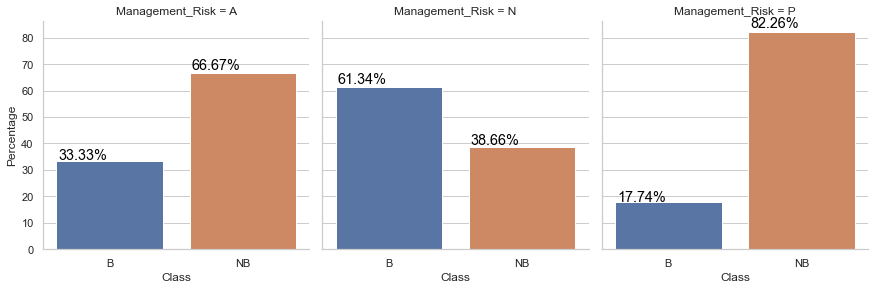

In [106]:

df_class_MR=df_bank.groupby(['Management_Risk','Class'])['Credibility'].count()
df_class_MR
df_class_MR_1=(df_class_MR/df_class_MR.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_MR_1.rename(columns={"Credibility": "Percentage"},inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Class",y="Percentage",col="Management_Risk",col_wrap=4
                ,data=df_class_MR_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(3):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')

<font color='red' style="font-weight:bold;">
     <font color='blue' style="font-weight:bold;"><p><u>TAKEAWAYS from the analysis of Management Risk and Class</u></p> </font> 
   
<p>
    
<li>
68% of the companies that are Bankrupt have Negative Management Risk. This shows that if a company fails on any 
of the Management-related factors, there is a 2/3rd chance that the company may go Bankrupt
</li>
</p>
    <p><li>82% of companies that have a Positive Management Risk are Not Bankrupt. 
    There is a higher propensity of a company to not go Bankrupt if the company is positive in terms of Management risk.
    Hence a positive Management risk could be a great indicator of a company not going bankrupt
    </li></p>


</font>

### Financial_Flexibility vs Class

<Figure size 288x216 with 0 Axes>

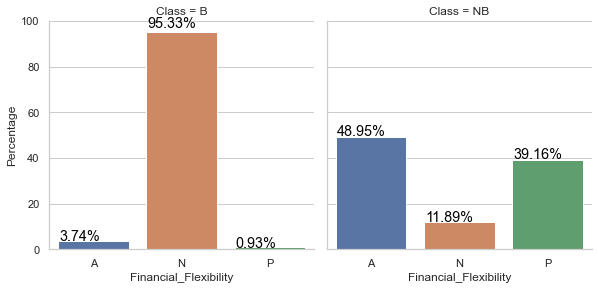

In [80]:

df_class_FF=df_bank.groupby(['Class','Financial_Flexibility'])['Credibility'].count()
df_class_FF
df_class_FF_1=(df_class_FF/df_class_FF.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_FF_1.rename(columns={"Credibility": "Percentage"},inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Financial_Flexibility",y="Percentage",col="Class",col_wrap=4
                ,data=df_class_FF_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(2):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')


<Figure size 288x216 with 0 Axes>

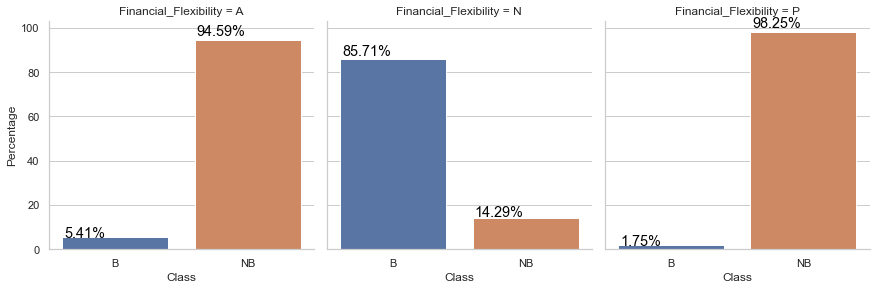

In [81]:

df_class_FF=df_bank.groupby(['Financial_Flexibility','Class'])['Credibility'].count()
df_class_FF
df_class_FF_1=(df_class_FF/df_class_FF.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_FF_1.rename(columns={"Credibility": "Percentage"},inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Class",y="Percentage",col="Financial_Flexibility",col_wrap=4
                ,data=df_class_FF_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(3):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')

<font color='red' style="font-weight:bold;">
   
 <font color='blue' style="font-weight:bold;"><p><u>TAKEAWAYS from the analysis of Financial Flexibility and Class</u></p> </font>   
   <p><li> 95% of the companies that are Bankrupt have Negative financial Flexibility </li></p>
    <p><li> 85% of the companies that rank negative on Financial Flexibility are Bankrupt </li></p>
     <p><li> 94% of the companies that rank Average and 98% of the companies that rank
         positive
         on Financial Flexibility are not Bankrupt </li></p>
    <p><li>
        This shows that Financial Flexibility could be a really good predictor of Bankruptcy
        </li>
    </p>

</font>

### Credibility vs Class

<Figure size 288x216 with 0 Axes>

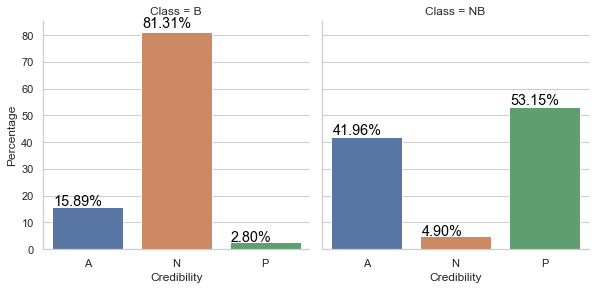

In [82]:
df_class_Cred=df_bank.groupby(['Class','Credibility'])['Financial_Flexibility'].count()
df_class_Cred
df_class_Cred_1=(df_class_Cred/df_class_Cred.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_Cred_1.rename(columns={"Financial_Flexibility": "Percentage"},inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Credibility",y="Percentage",col="Class",col_wrap=4
                ,data=df_class_Cred_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(2):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')


<Figure size 288x216 with 0 Axes>

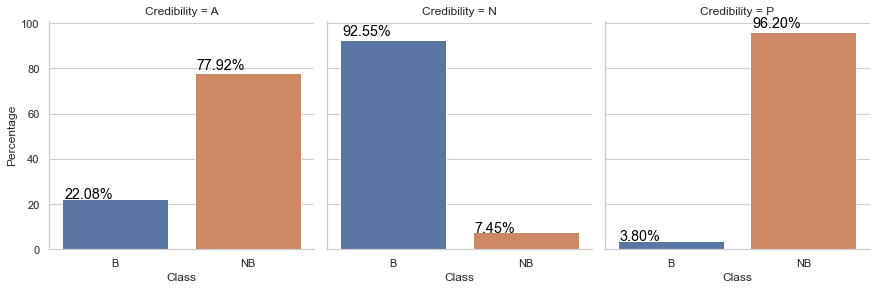

In [83]:
df_class_Cred=df_bank.groupby(['Credibility','Class'])['Financial_Flexibility'].count()
df_class_Cred
df_class_Cred_1=(df_class_Cred/df_class_Cred.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_Cred_1.rename(columns={"Financial_Flexibility": "Percentage"},inplace=True)


sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Class",y="Percentage",col="Credibility",col_wrap=4
                ,data=df_class_Cred_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(3):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')

<font color='red' style="font-weight:bold;">
    <font color='blue' style="font-weight:bold;"><p><u>TAKEAWAYS from the analysis of Credibility and Class</u></p> </font>
<p><li> 81% of the companies that are Bankrupt have Negative Credibility rating and more than 50% of the companies
that are not bankrupt have a positive Credibility score</li></p>
    <p><li> 92% of the companies that rank negative on Credibility are Bankrupt </li></p>
     <p><li> 96% of the companies that rank Positive on Credibility are not Bankrupt </li></p>
    <p><li>
        This shows that Positive Credibility is a great indicator of 
        a non-bankrupt company and Negative Credibility is a pretty fair indicator of a bankrupt company
       </li>
    </p>

</font>

### Competitiveness vs Class

<Figure size 288x216 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


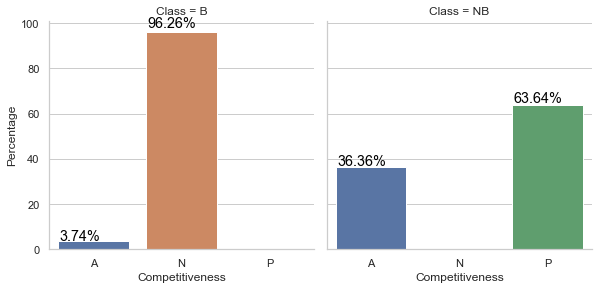

In [87]:
df_class_Comp=df_bank.groupby(['Class','Competitiveness'])['Financial_Flexibility'].count()
df_class_Comp
df_class_Comp_1=(df_class_Comp/df_class_Comp.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_Comp_1.rename(columns={"Financial_Flexibility": "Percentage"},inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Competitiveness",y="Percentage",col="Class",col_wrap=4
                ,data=df_class_Comp_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(2):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')


<Figure size 288x216 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


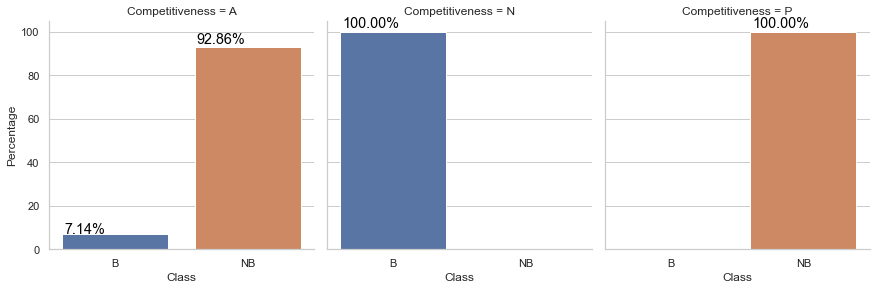

In [89]:
df_class_Comp=df_bank.groupby(['Competitiveness','Class'])['Financial_Flexibility'].count()
df_class_Comp
df_class_Comp_1=(df_class_Comp/df_class_Comp.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_Comp_1.rename(columns={"Financial_Flexibility": "Percentage"},inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Class",y="Percentage",col="Competitiveness",col_wrap=4
                ,data=df_class_Comp_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(3):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')


<font color='red' style="font-weight:bold;">
    <font color='blue' style="font-weight:bold;"><p><u>TAKEAWAYS from the analysis of Competitiveness and Class</u></p> </font>
<p><li> 96% of the companies that are Bankrupt have Negative Competitiveness rating and about 63% of the companies
that are not bankrupt have a positive Competitiveness score</li></p>
    <p><li> All companies that rank negative on Competitiveness are Bankrupt ==> This is a perfect predictor of a bankrupt company </li></p>
     <p><li>All companies that rank Positive on Competitiveness are Not Bankrupt ==> This is a perfect predictor of a non-bankrupt company</li></p>
</font>

### Operating_Risk vs Class

<Figure size 288x216 with 0 Axes>

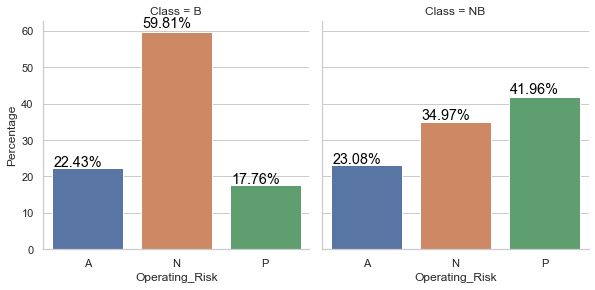

In [90]:
df_class_OR=df_bank.groupby(['Class','Operating_Risk'])['Financial_Flexibility'].count()
df_class_OR
df_class_OR_1=(df_class_OR/df_class_OR.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_OR_1.rename(columns={"Financial_Flexibility": "Percentage"},inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Operating_Risk",y="Percentage",col="Class",col_wrap=4
                ,data=df_class_OR_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(2):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')


<Figure size 288x216 with 0 Axes>

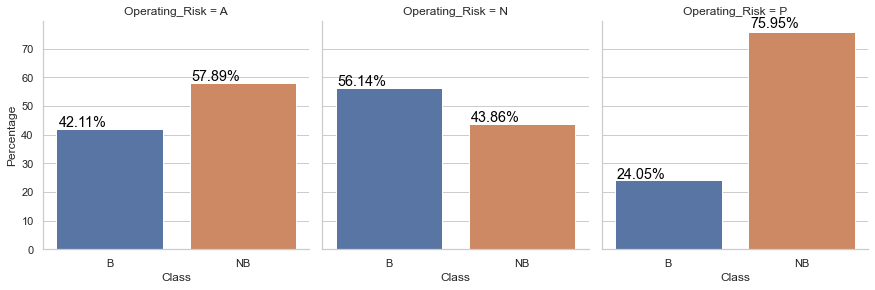

In [92]:
df_class_OR=df_bank.groupby(['Operating_Risk','Class'])['Financial_Flexibility'].count()
df_class_OR
df_class_OR_1=(df_class_OR/df_class_OR.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_OR_1.rename(columns={"Financial_Flexibility": "Percentage"},inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Class",y="Percentage",col="Operating_Risk",col_wrap=4
                ,data=df_class_OR_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(3):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')


<font color='red' style="font-weight:bold;">
    <font color='blue' style="font-weight:bold;"><p><u>TAKEAWAYS from the analysis of Operating_Risk and Class</u></p> </font>
<p><li> ~ 60% of the companies that are Bankrupt have Negative Operating Risk </li></p>
    <p><li>~ 76% of the companies that have a positive Operating Risk are not bankrupt. Hence this can be a good proxy for
    non-bankrupt companies</li></p>
</font>

### Industrial Risk and Management risk

<Figure size 288x216 with 0 Axes>

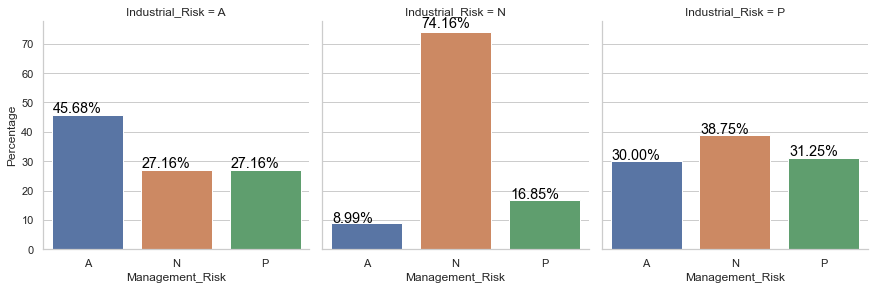

In [94]:
df_class_IM=df_bank.groupby(['Industrial_Risk','Management_Risk'])['Financial_Flexibility'].count()
df_class_IM
df_class_IM_1=(df_class_IM/df_class_IM.groupby(level=[0]).transform('sum')*100).reset_index()
df_class_IM_1.rename(columns={"Financial_Flexibility": "Percentage"},inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Management_Risk",y="Percentage",col="Industrial_Risk",col_wrap=4
                ,data=df_class_IM_1
                ,orient="v",
                kind='bar', height=4, aspect=1, legend=True)
#g.set_titles("HH3K Plot")

#g.facet_axis(0,1)


for i in range(3):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.2f}%'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')

<font color='red' style="font-weight:bold;">
    <font color='blue' style="font-weight:bold;"><p><u>TAKEAWAYS from the analysis of Industrial_Risk and Management_Risk</u></p> </font>
<p><li> ~ 75% of the companies that are have a negative Industrial risk also have negative management risk.
    This proves the high correlation that exists between Industrial risk and management risk </li></p>
</font>

# Classification Model to predict Bankruptcy

Now that we have performed in-depth Exploratory analysis, let's dive into the pre-processing and modelling phase.


I personally tend to use PyCaret for all modelling tasks. It is a personal preference since Pycaret is a low code, and higly efficient library that is capable of providing great results in very less span of time.

Hence, if you want to execute the below lines of code, please install PyCaret first, to avoid errors

In [20]:
from pycaret.classification import *

In this scenario, there was no requirement for Data Cleaning since there are no missing values in this dataset.

The below process with the `setup` function is responsible for setting up the Pre-processing  pipeline, fixing class imbalances, and in defining the type of pre-processing depending on the type of variables (Categorical and numerical).

In the below function, I am using one-hot encoding to dummify all categorical variables. A hold-out set of 30% is sampled from the dataset to be used for later validation of tuned models.

## Setting up the Pre-processing pipeline

In [21]:
exp_class1 = setup(data = df_bank, target = 'Class', session_id=123,silent=True) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"B: 0, NB: 1"
3,Original Data,"(250, 7)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Modelling for Bankruptcy indicator

### Building top 10 models

In [22]:
"""
Comparing top 10 models, each built using 15-fold Cross validation
"""
best = compare_models(n_select = 10,fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0033
1,K Neighbors Classifier,0.9944,1.0000,0.9905,1.0000,0.9949,0.9889,0.9897,0.0025
2,Decision Tree Classifier,0.9944,0.9933,1.0000,0.9917,0.9956,0.9882,0.9891,0.0026
3,Ridge Classifier,0.9944,0.0000,1.0000,0.9917,0.9956,0.9882,0.9891,0.0037
4,Random Forest Classifier,0.9944,1.0000,1.0000,0.9917,0.9956,0.9882,0.9891,0.1109
5,Extra Trees Classifier,0.9944,1.0000,1.0000,0.9917,0.9956,0.9882,0.9891,0.1434
6,Extreme Gradient Boosting,0.9944,0.9933,1.0000,0.9917,0.9956,0.9882,0.9891,0.0200
7,Light Gradient Boosting Machine,0.9944,0.9933,1.0000,0.9917,0.9956,0.9882,0.9891,0.0250
8,CatBoost Classifier,0.9944,1.0000,1.0000,0.9917,0.9956,0.9882,0.9891,2.1874
9,Logistic Regression,0.9889,1.0000,1.0000,0.9833,0.9911,0.9765,0.9782,0.0088


The function `get_config()` is used to obtain all the parameteres of the pre-processing pipeline necessary. In the below lines of code, I am obtaining the transformed dataset and preprocessing-pipeline and showing them as outputs

In [23]:
"""

X: Transformed dataset (X)
y: Transformed dataset (y)  
X_train: Transformed train dataset (X)
X_test: Transformed test/holdout dataset (X)
y_train: Transformed train dataset (y)
y_test: Transformed test/holdout dataset (y)
"""

X = get_config('X')
y = get_config('y')   
X_train = get_config('X_train')    
X_test = get_config('X_test')
y_train = get_config('y_train')
y_test = get_config('y_test')
prep_pipe =get_config('prep_pipe')

In [24]:
X_train.columns

Index(['Industrial_Risk_A', 'Industrial_Risk_N', 'Industrial_Risk_P',
       'Management_Risk_A', 'Management_Risk_N', 'Management_Risk_P',
       'Financial_Flexibility_A', 'Financial_Flexibility_N',
       'Financial_Flexibility_P', 'Credibility_A', 'Credibility_N',
       'Credibility_P', 'Competitiveness_A', 'Competitiveness_N',
       'Competitiveness_P', 'Operating_Risk_A', 'Operating_Risk_N',
       'Operating_Risk_P'],
      dtype='object')

In [25]:
X_train.head()

,Industrial_Risk_A,Industrial_Risk_N,Industrial_Risk_P,Management_Risk_A,Management_Risk_N,Management_Risk_P,Financial_Flexibility_A,Financial_Flexibility_N,Financial_Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating_Risk_A,Operating_Risk_N,Operating_Risk_P
138,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
61,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
242,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
82,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
155,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [26]:
prep_pipe

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Lev...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='Class')),
                ('fix_perfect', Empty

### Tuning Hyperparameters of top 10 models

In [27]:
"""
Tuning the hyperparameters of the top 10 models
"""
tuned_models=[tune_model(i) for i in best]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9444,1.0000,1.0000,0.9091,0.9524,0.8861,0.8919
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9412,1.0000,1.0000,0.9091,0.9524,0.8759,0.8827
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [31]:
"""
Printing all the tuned models
"""
tuned_models

[LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.0005,
                            solver='lsqr', store_covariance=False, tol=0.0001),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                      metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                      weights='uniform'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=10, max_features=3, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=4, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=123, splitter='best'),
 RidgeClassifier(alpha=0.895, class_weight=None, copy_X=True,
                 fit_intercept=False, max_iter=None, normalize=True,
                 random_state=123, solver='auto', tol=0.001),
 RandomForestClassifier(boots

In [32]:
"""
Predictions on the holdout set,using top 10 tuned models
"""
predicts_holdout_set=[predict_model(i) for i in tuned_models]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9605,0.9545,1.0,0.9348,0.9663,0.9188,0.9218


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9605,0.9979,1.0,0.9348,0.9663,0.9188,0.9218


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9605,0,1.0,0.9348,0.9663,0.9188,0.9218


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9605,1.0,1.0,0.9348,0.9663,0.9188,0.9218


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9605,1.0,1.0,0.9348,0.9663,0.9188,0.9218


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9605,1.0,1.0,0.9348,0.9663,0.9188,0.9218


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<font color='red' style="font-weight:bold;">
   We see that Extra Trees Classifier model produces the highest AUC (AUC=1). Hence we will be using that as the Champion model for further analysis

</font>

## Feature importances

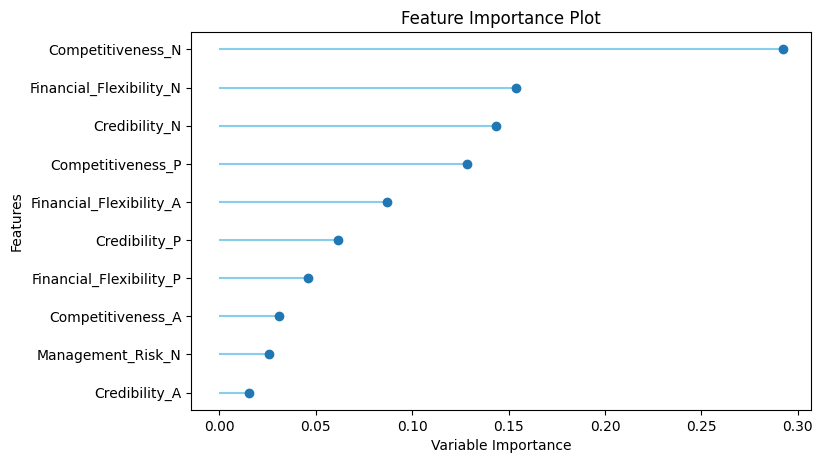

In [34]:
etc = tuned_models[5]
plot_model(etc, plot='feature')

<font color='red' style="font-weight:bold;">
    <font color='blue' style="font-weight:bold;"><p><u>TAKEAWAYS from the Feature Importance plot</u></p> </font>
<p><li> The feature importance plot indicates that Competitiveness=N is the most important factor that determines Bankruptcy. This makes complete sense as we saw that Competitiveness=N directly corresponded to Bankruptcy and  Competitiveness=P directly corresponded to No-Bankruptcy </li></p>
<p><li> Similarly a firm having Negative Financial Flexibility is more likely to be Bankrupt, and so is a firm having Negative Credibility </li></p>

</font>




## AUC Plot

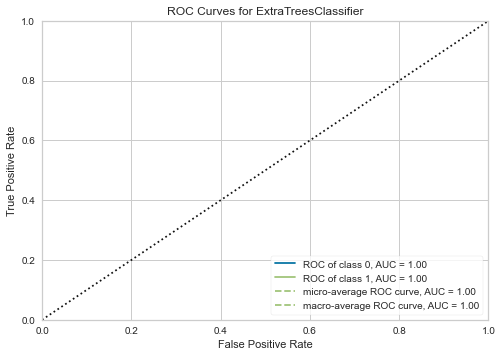

In [35]:
plot_model(etc, plot='auc')

## Confusion Matrix

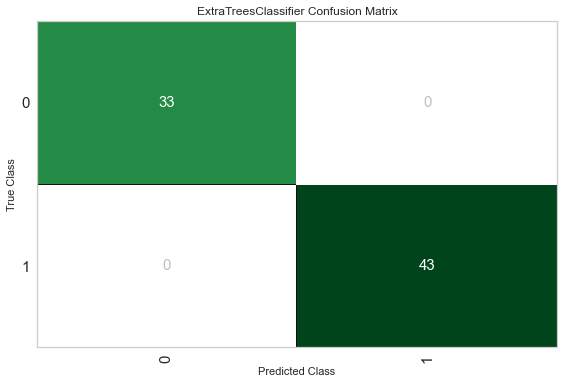

In [37]:
plot_model(etc, plot='confusion_matrix')

## Using SHAP values to explain the model

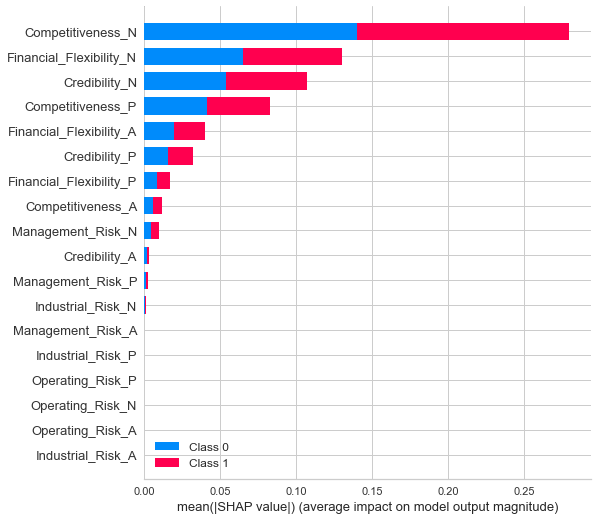

In [38]:
interpret_model(etc)

<font color='red' style="font-weight:bold;">
    <font color='blue' style="font-weight:bold;"><p><u>TAKEAWAYS from SHAP plot</u></p> </font>
<p><li> Competitiveness=N, Financial Flexibility=N,Credibility=N,Competiveness=P are the factors that help in explaining Bankruptcy </li></p>
</font>
